In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
dataframe = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
dataframe.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Pre-processing data

Remove less important information
- ID 
- TENURE

In [3]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

# Find missing data

In [4]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


# Replace missing by the median

In [5]:
dataframe.fillna(dataframe.median(), inplace=True)
missing_2 = dataframe.isna().sum()
print(missing_2)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


# Normalize data

In [6]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


# Clustering

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)


# Validation
* Calculate the Silhouette coeff
* Davis - Bouldin
* Calinski-Harabasz

In [8]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
# interval -1 to 1

print(silhouette)



0.36454314826693845


In [9]:
dbs = metrics.davies_bouldin_score(values, labels)
# best near to 0
print(dbs)

1.075812734747931


In [10]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800540734652


# Relative Validation

- change relative params to showed the best configuration

In [11]:
def cluster_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset,labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
for i in range(3,21):
    res = cluster_algorithm(i, values)
    print(f'- {i}- clusters --> silhouette: {res[0]} Davis-Bouldin: {res[1]} Calinski: {res[2]}')

- 3- clusters --> silhouette: 0.32725336851623266 Davis-Bouldin: 1.3088971675061216 Calinski: 3526.442925405916
- 4- clusters --> silhouette: 0.34825743673945714 Davis-Bouldin: 1.2212897290249243 Calinski: 3528.7176223195843
- 5- clusters --> silhouette: 0.36443927743081506 Davis-Bouldin: 1.0758787031571042 Calinski: 3431.7825481721115
- 6- clusters --> silhouette: 0.3648612709703419 Davis-Bouldin: 1.0450002540951495 Calinski: 3523.5060648071935
- 7- clusters --> silhouette: 0.3288397623935549 Davis-Bouldin: 1.1504504421432544 Calinski: 3398.2648890651285
- 8- clusters --> silhouette: 0.3091177629853773 Davis-Bouldin: 1.1741868793526655 Calinski: 3239.102727186973
- 9- clusters --> silhouette: 0.3064693644581648 Davis-Bouldin: 1.2036285768757555 Calinski: 3106.685608143849
- 10- clusters --> silhouette: 0.3514695217833781 Davis-Bouldin: 1.1164510747501788 Calinski: 3019.180251559703
- 11- clusters --> silhouette: 0.30285353019068734 Davis-Bouldin: 1.1427328854618126 Calinski: 2956.6818

In [13]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [14]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = cluster_algorithm(6, random_data)
print(s, dbs, calinski)
print(cluster_algorithm(6, values))

0.03942973072131677 3.332296802620501 279.80256480496115
(0.3648636628819813, 1.045092652141706, 3523.512534900494)


In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = cluster_algorithm(6, set1)
s2, dbs2, calinski2 = cluster_algorithm(6, set2)
s3, dbs3, calinski3 = cluster_algorithm(6, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36417278939406283 1.0229412794780184 1192.3905525414714
0.36494263595135273 1.0595340445686856 1169.481552307091
0.3722891909005901 1.0418371259144836 1184.7944767274792


Text(0, 0.5, 'Valor total gasto')

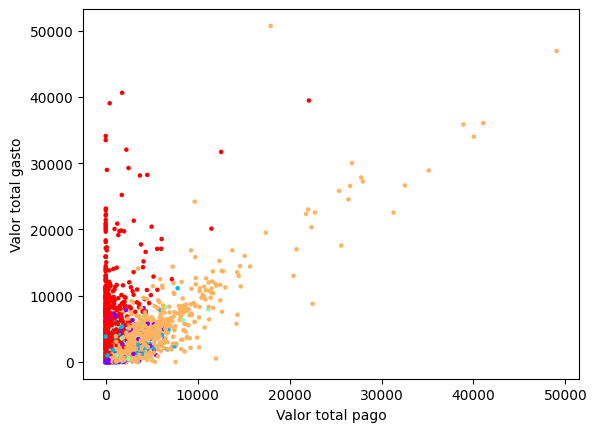

In [16]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


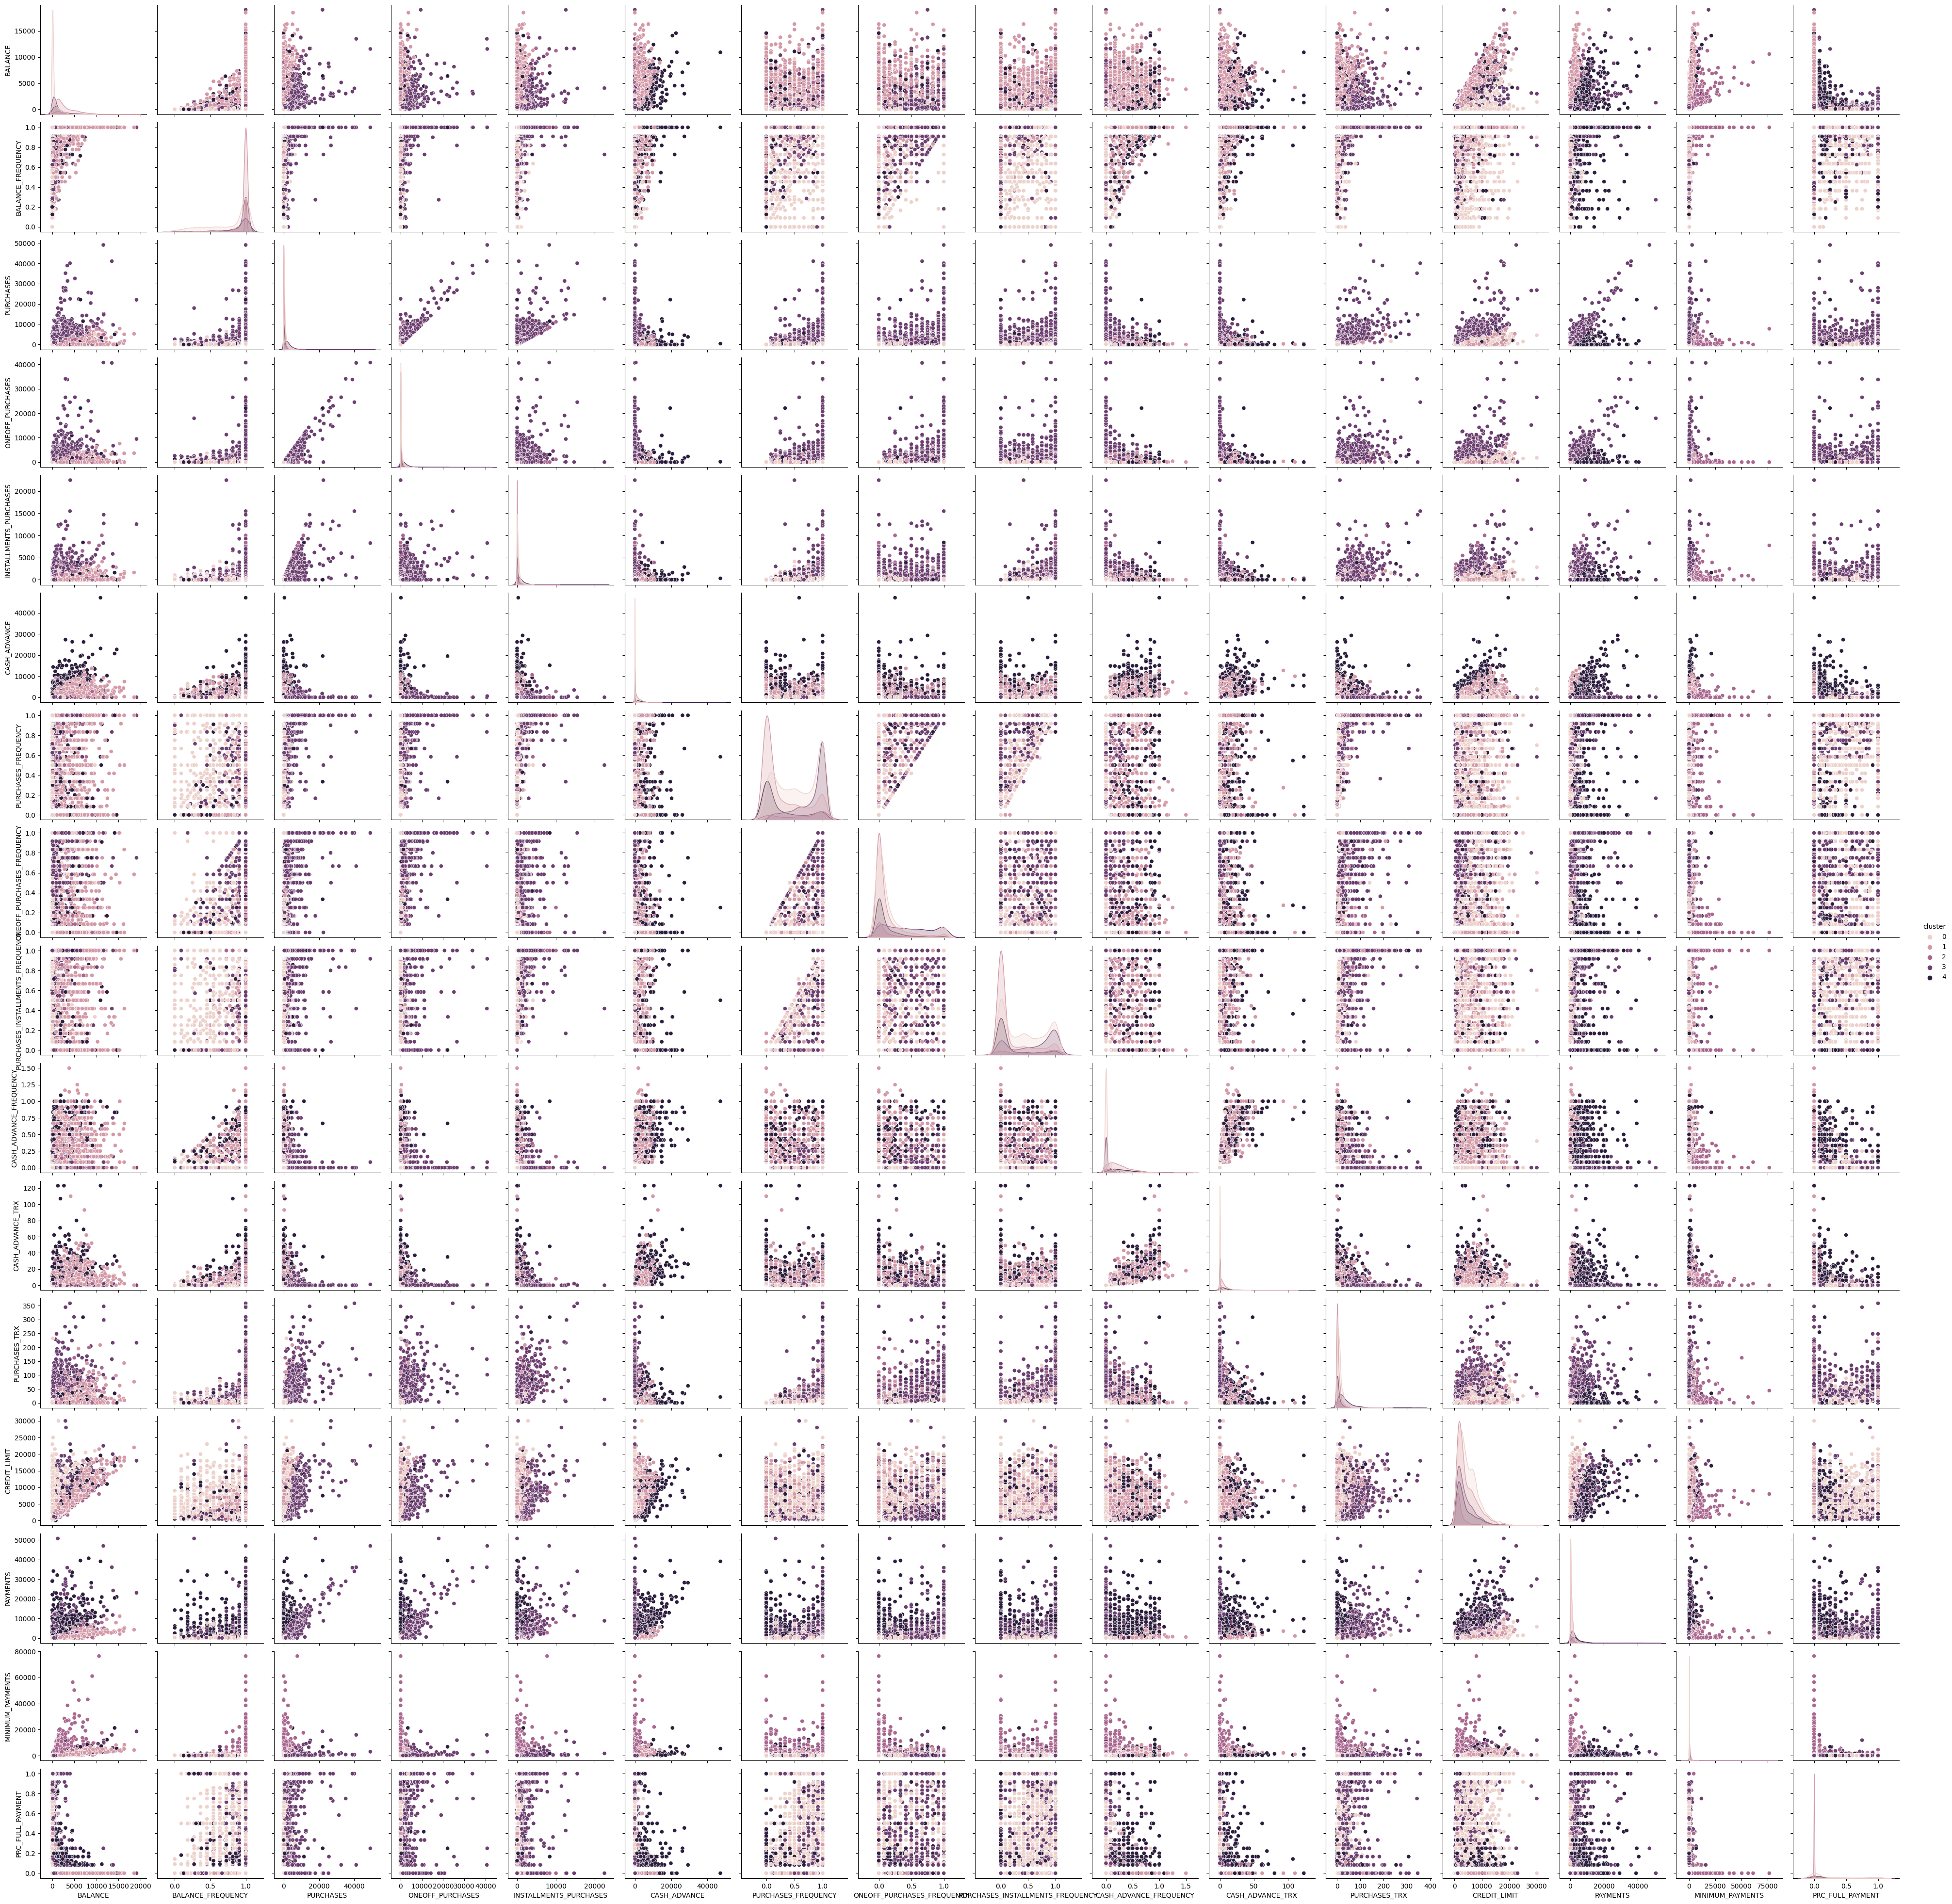

In [17]:
import seaborn as sns

dataframe['cluster'] = labels

sns.pairplot(dataframe[0:], hue='cluster')

# See the client values

In [18]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1537.0  1142.320861  1664.363459   0.000000   212.282538   
4        1073.0  1795.328292  1982.485775   0.000000   507.076999   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3         555.131027  1370.317105  19043.138560            1537.0  0.928267   
4        1088.056301  2315.003636  14581.459140            1073.0  0.862260   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       523.893953  18621.013310           1537.0  0.278150   
4        ...       884.183626  21235.065300           1073.0  0.117430   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.367086  0.0  0.0  0.083333  0.545455  1.0  
4        0.186772  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [1.59999628e-01 2.45301618e-04 4.38629300e-01 2.57109259e-01
  1.81691775e-01 2.58728121e-02 2.04397971e-04 8.90423829e-05
  1.50590954e-04 9.39341912e-06 1.69901859e-04 6.17457556e-03
  6.03719056e-01 4.02576568e-01 8.54459126e-02 7.19457109e-05]
 [2.

In [20]:
for i,_ in enumerate(centroids[0]):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


## searching the client behavior

`
BALANCE 0.0224
PURCHASES 0.0197
CASH_ADVANCE 0.0225
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0541 <- this is related to less payment to use the credit card, so discard
`


In [21]:
description = dataframe.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.746756   629.249107    141.482978   5130.547795   814.294226   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   
4        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   

         n_clients  
cluster             
0             3280  
1             2649  
2              411  
3             1537  
4             1073  


In [22]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
1        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
2         411.0  0.019318  0.090901  0.0  0.0  0.000000  0.000000  1.0
3        1537.0  0.278150  0.367086  0.0  0.0  0.083333  0.545455  1.0
4        1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0

# analise dos clientes por faixa de clusters

* Cluster 0: Clientes com os maiores valores gastos. Menor valor em compras. Valor consideravel em saques. Pessimos pagadores. Boa quantidade de clientes.
* Cluster 1: Clientes com menores valores gastos. Menor valor em saques. Clientes com maior limite de credito. Bons pagadores. Maior numero de clientes.
* Cluster 2: Clientes com menor limite de credito. Não são bons pagadores. Menor numero de clientes.
* Cluster 3: Maior valor em compras. Melhores Pgadores
* Cluster 4: Maior valor em saques. Pagam as vezes